In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

In [2]:
cust_data = pd.read_csv("segmentation_data.csv")

In [3]:
cust_data.drop(['ID'], axis=1, inplace=True)

In [4]:
cust_data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cust_data)

In [7]:
scaled_data

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

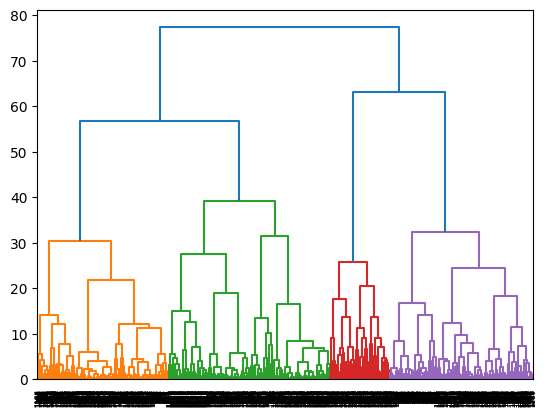

In [8]:
# dendrogram
dendro = sch.dendrogram(sch.linkage(scaled_data, method="ward"))

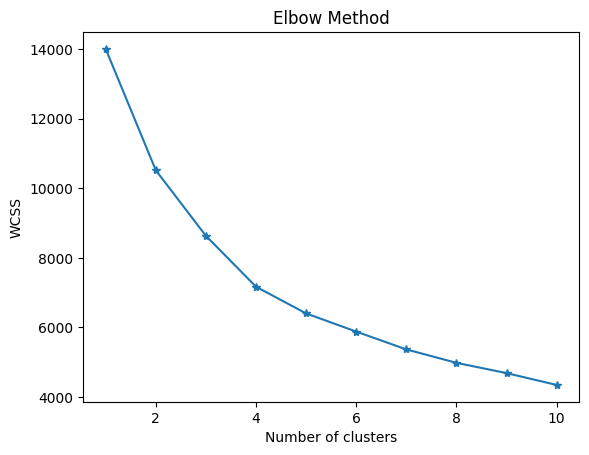

In [9]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="*")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

number of clusters = 4

In [10]:
cluster = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="single")
cust_data['Cluster'] = cluster.fit_predict(scaled_data)

In [11]:
cluster = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
cust_data['Cluster1'] = cluster.fit_predict(cust_data)

In [12]:
cust_data.sort_values('Cluster1')

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Cluster1
1028,1,1,45,2,262634,2,2,0,0
1027,0,0,72,2,224961,2,2,0,0
744,0,0,30,0,250050,2,1,0,0
509,0,0,45,1,221842,2,2,0,0
1029,0,0,68,2,287106,2,2,0,0
...,...,...,...,...,...,...,...,...,...
1332,1,1,27,1,107932,0,0,0,3
1333,1,1,48,2,116235,0,0,0,3
1335,1,1,40,1,124001,0,0,0,3
1321,1,0,48,2,118749,0,0,0,3


In [13]:
cust_data["Cluster1"].value_counts()

Cluster1
3    839
1    560
2    491
0    110
Name: count, dtype: int64

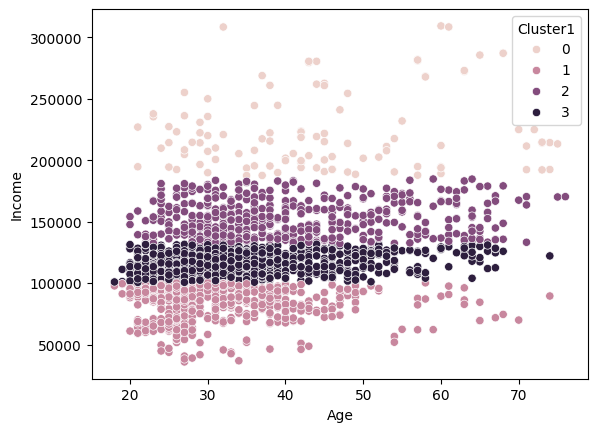

In [14]:
sn.scatterplot(x="Age",y="Income",hue="Cluster1",data=cust_data)
plt.show()

In [15]:
cust_data['Income'].mean()

120954.419

<Axes: xlabel='Income', ylabel='Count'>

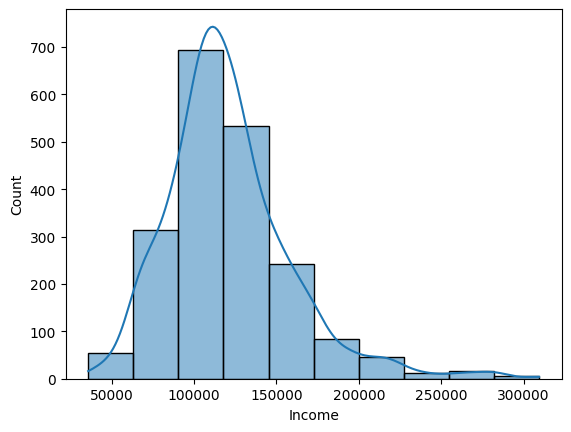

In [16]:
sn.histplot(cust_data['Income'],bins=10,kde=True)

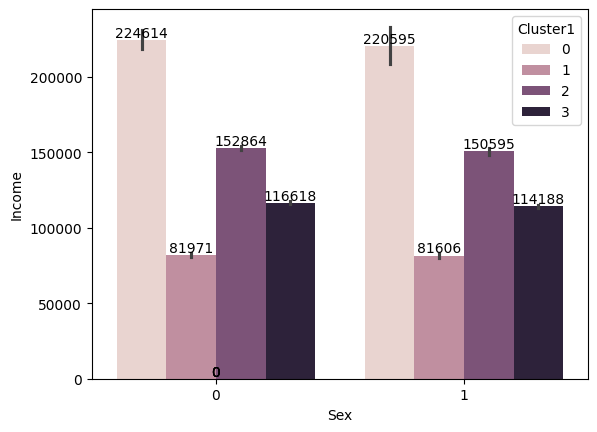

In [17]:
bar = sn.barplot(cust_data, x='Sex', y='Income', hue='Cluster1')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

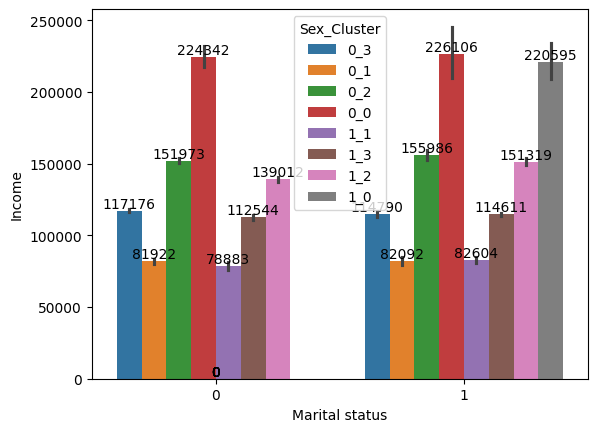

In [19]:
cust_data['Sex_Cluster'] = cust_data['Sex'].astype(str) + '_' + cust_data['Cluster1'].astype(str)
bar = sn.barplot(cust_data, x='Marital status', y='Income', hue='Sex_Cluster')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

In [29]:
cust_data['Age'].corr(cust_data['Income'])

0.3406101637317352

In [30]:
correlations = cust_data.groupby('Cluster1').apply(lambda x: x['Age'].corr(x['Income']))
print(correlations)

Cluster1
0    0.153131
1    0.034222
2    0.086721
3    0.250125
dtype: float64


In [31]:
# Descriptive Statistics
cluster_summary = cust_data.groupby('Cluster1')[['Age', 'Income']].mean()
cluster_summary2 = cust_data.groupby('Cluster1')[['Sex', 'Marital status', "Education", "Occupation", "Settlement size"]].apply(lambda x: x.mode())
cluster_summary3 = cust_data.groupby('Cluster1')[['Sex', 'Marital status', "Education", "Occupation", "Settlement size"]].apply(lambda x: x.median())
cluster_summary4 = cust_data.groupby('Cluster1')[['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']].apply(lambda x: x.apply(pd.Series.value_counts))
print("Cluster Summaries:")
print(cluster_summary)
print(cluster_summary2)
print(cluster_summary3)
print(cluster_summary4)


Cluster Summaries:
                Age         Income
Cluster1                          
0         44.727273  223444.563636
1         31.907143   81766.741071
2         40.702648  152156.739308
3         34.618594  115413.113230
            Sex  Marital status  Education  Occupation  Settlement size
Cluster1                                                               
0        0    0               0          2           2                2
1        0    1               1          1           0                0
2        0    0               0          1           1                1
3        0    0               1          1           1                0
          Sex  Marital status  Education  Occupation  Settlement size
Cluster1                                                             
0         0.0             0.0        1.0         2.0              2.0
1         1.0             1.0        1.0         0.0              0.0
2         0.0             0.0        1.0         1.0       

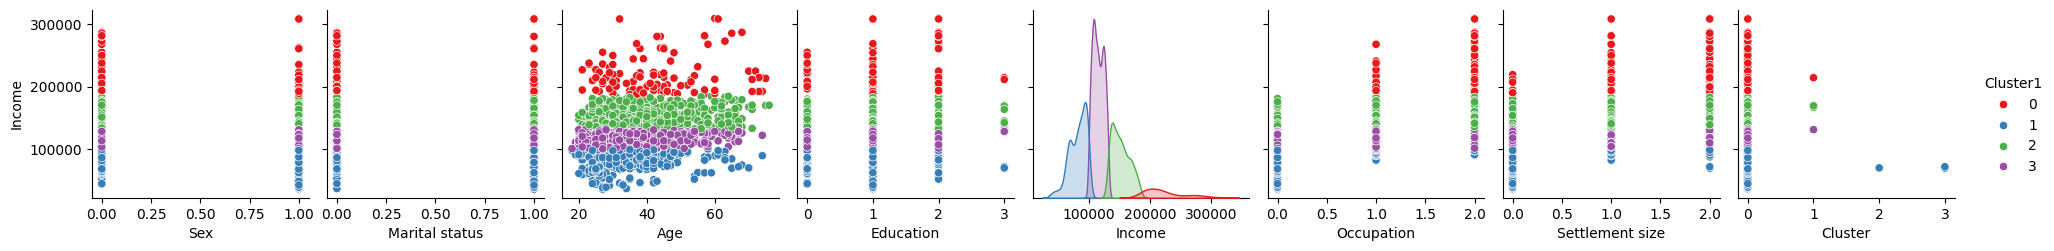

In [32]:
# Visualization: Pair Plot
sn.pairplot(cust_data, y_vars=['Income'], hue='Cluster1', palette='Set1')
plt.show()


<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


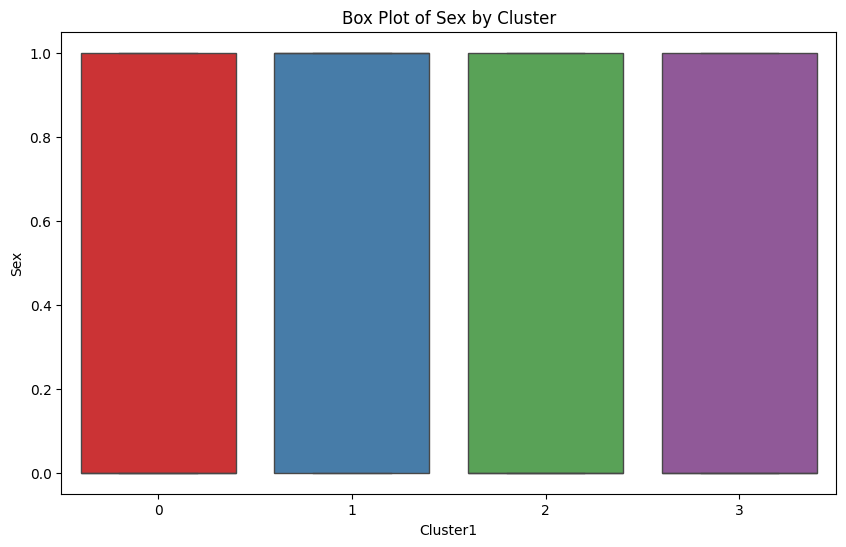

<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


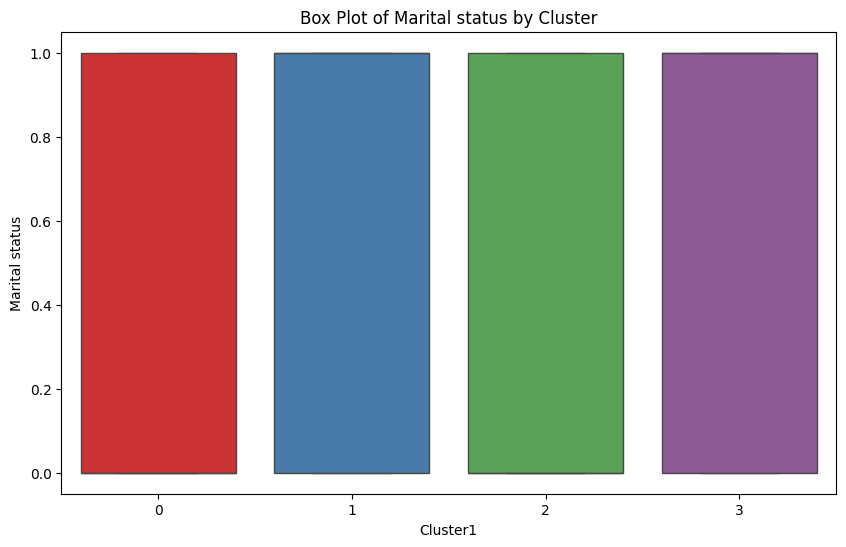

<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


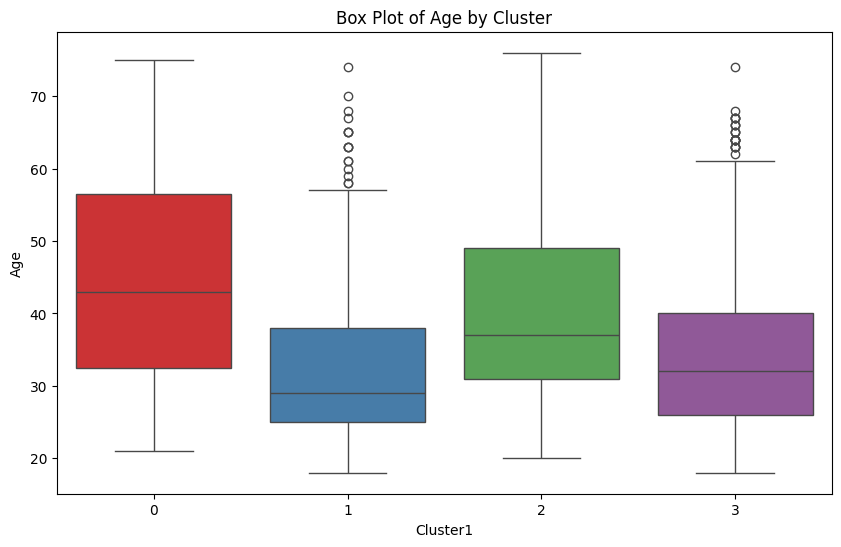

<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


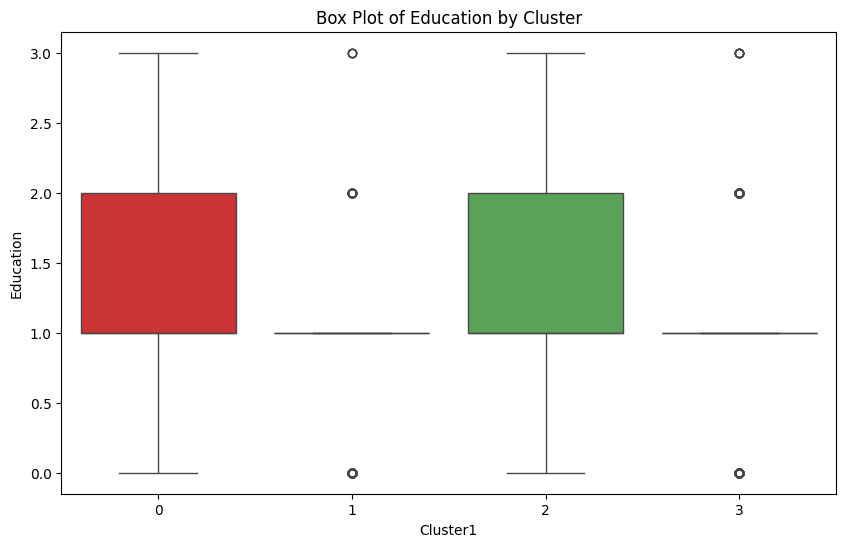

<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


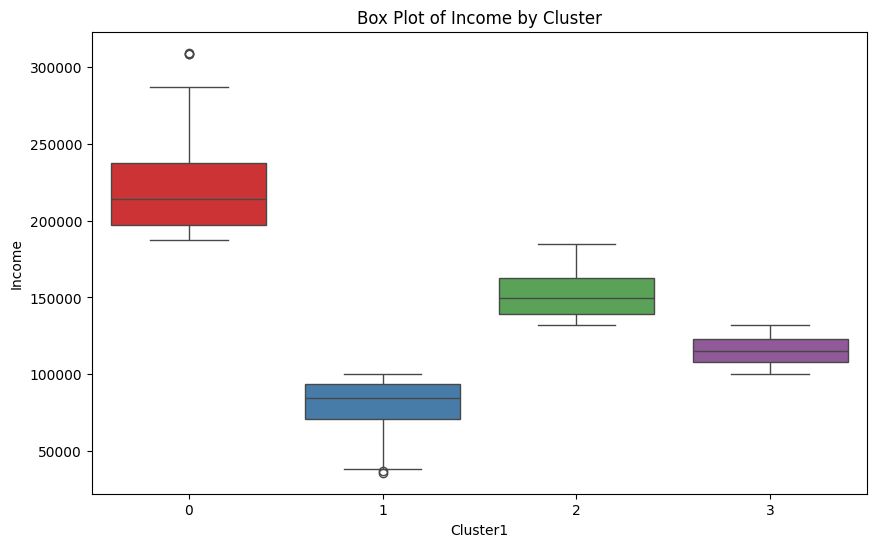

<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


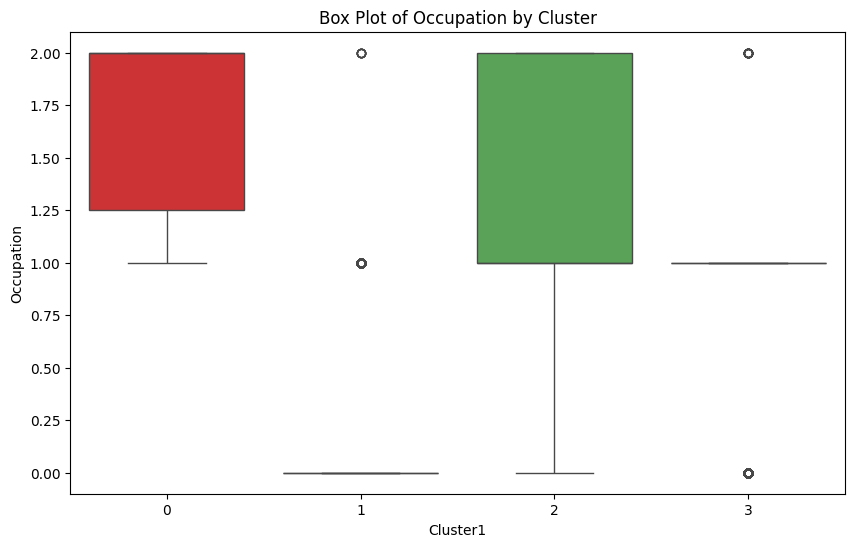

<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


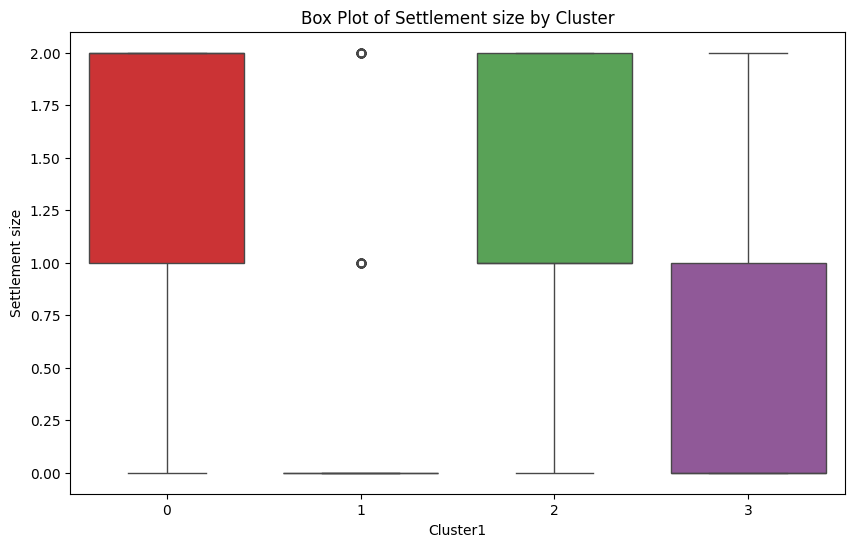

<ipython-input-33-38bb97c13dd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')


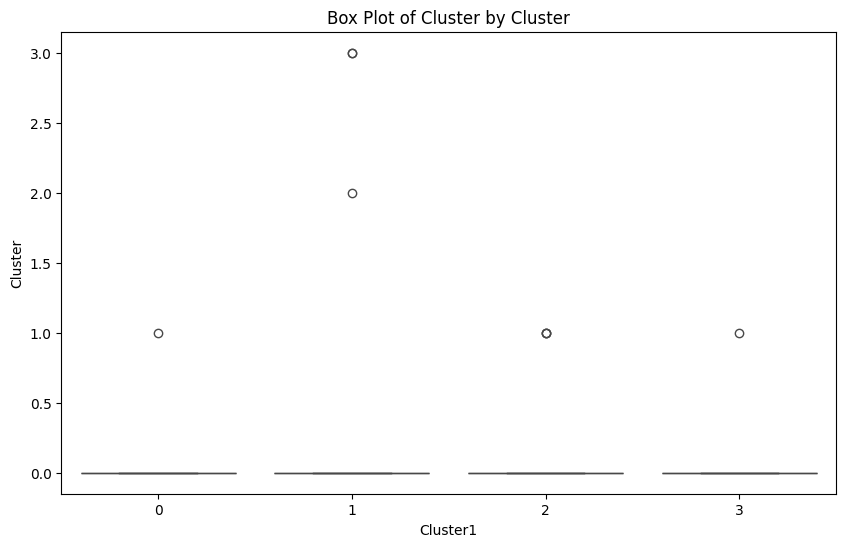

In [33]:
# Visualization: Box Plot
for col in cust_data.columns[:-2]:  # Exclude 'cluster' column
    plt.figure(figsize=(10, 6))
    sn.boxplot(x='Cluster1', y=col, data=cust_data, palette='Set1')
    plt.title(f'Box Plot of {col} by Cluster')
    plt.show()

In [34]:
# Silhouette Score (for cluster quality assessment)
from sklearn.metrics import silhouette_score
score = silhouette_score(cust_data.drop(['Cluster', 'Cluster1'], axis=1), cust_data['Cluster1'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.53


## SUMMARY

1. Based on the dataset, after data standardisation, the clustering function created 4 clusters for the dataset.
2. The clustering was majorly dependent on Income feature, since that is the most variable.
3. For income on x axis, every other feature displays clearly separate clusters as shown in [pairplots](https://https://colab.research.google.com/drive/1Yp9X-PxFjSo7La4qyrTJgRQeZEsi3t9F#scrollTo=o_2FO_0Aa4Px&line=1&uniqifier=1).
4. Most of the features are categorical, hence not contributing much to the clustering algorithm.
5. With male and female, the [income distribution](https://colab.research.google.com/drive/1Yp9X-PxFjSo7La4qyrTJgRQeZEsi3t9F#scrollTo=l7ALxpW5_1FA&line=7&uniqifier=1) does not show any parity.
6. Since clusters are formed based on income, we can take income as the target.